In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [2]:
copynumer_df = pd.read_csv('./Lung/20231023_092657_imputed_copynumber.csv', index_col='Unnamed: 0')
drugresponse_df = pd.read_csv('./Lung/20231023_092657_imputed_drugresponse.csv', index_col='Unnamed: 0')
metabolomics_df = pd.read_csv('./Lung/20231023_092657_imputed_metabolomics.csv', index_col='Unnamed: 0')
methylation_df = pd.read_csv('./Lung/20231023_092657_imputed_methylation.csv', index_col='Unnamed: 0')
proteomics_df = pd.read_csv('./Lung/20231023_092657_imputed_proteomics.csv', index_col='Unnamed: 0')
transcriptomics_df = pd.read_csv('./Lung/20231023_092657_imputed_transcriptomics.csv', index_col='Unnamed: 0')

### Fusion Data

In [3]:
fusions_df = pd.read_csv('./Lung/20231023_092657_fusions_latest.csv')

In [4]:
fusions_df.shape

(1888, 13)

In [5]:
fusions_df.head()

,gene_id_5prime,gene_symbol_5prime,chr_5prime,gene_id_3prime,gene_symbol_3prime,chr_3prime,model_id,model_name,tissue,in_patient,in_frame,in_cosmic_fusions,dataset
0,SIDG31561,RPL9P8,15,SIDG07923,ERAL1,17,SIDM00339,LXF-289,Lung,False,No,False,Sanger Cell Lines Fusions
1,SIDG31561,RPL9P8,15,SIDG07923,ERAL1,17,SIDM00339,LXF-289,Lung,False,No,False,Sanger Cell Lines Fusions
2,SIDG00004,A2M,12,SIDG05735,CUX1,7,SIDM00518,NCI-H290,Lung,False,No,False,Sanger Cell Lines Fusions
3,SIDG00004,A2M,12,SIDG05735,CUX1,7,SIDM00518,NCI-H290,Lung,False,Yes,False,Sanger Cell Lines Fusions
4,SIDG00064,ABCB1,7,SIDG13047,IMMP2L,7,SIDM00311,NCI-H2810,Lung,False,No,False,Sanger Cell Lines Fusions


In [6]:
fusions_df.drop_duplicates().shape

(1602, 13)

In [7]:
fusions_df.gene_id_5prime.nunique()

1206

In [8]:
(fusions_df.gene_symbol_5prime + '_' + fusions_df.chr_5prime).nunique()

1206

In [9]:
fusions_df.gene_id_3prime.nunique()

1274

In [10]:
(fusions_df.gene_symbol_3prime + '_' + fusions_df.chr_3prime).nunique()

1274

In [11]:
fusions_df.model_name.nunique()

175

In [12]:
(fusions_df.gene_id_3prime + '_' + fusions_df.gene_id_5prime).nunique()

1434

In [13]:
fusions_df.dataset.nunique()

1

In [14]:
fusions_df.tissue.nunique()

1

In [15]:
fusions_df = fusions_df[['model_id', 'gene_id_5prime', 'gene_id_3prime', 'in_patient', 'in_frame', 'in_cosmic_fusions']]

In [16]:
fusions_df.head()

,model_id,gene_id_5prime,gene_id_3prime,in_patient,in_frame,in_cosmic_fusions
0,SIDM00339,SIDG31561,SIDG07923,False,No,False
1,SIDM00339,SIDG31561,SIDG07923,False,No,False
2,SIDM00518,SIDG00004,SIDG05735,False,No,False
3,SIDM00518,SIDG00004,SIDG05735,False,Yes,False
4,SIDM00311,SIDG00064,SIDG13047,False,No,False


In [17]:
fusions_df.in_frame.unique()

array(['No', 'Yes', 'stop-codon', 'ambiguous', '5UTR_5UTR', '5UTR_CODING',
       '3UTR_5UTR', '3UTR_CODING', 'SOMETHING_INTRON', '3UTR_3UTR'],
      dtype=object)

In [18]:
pd.get_dummies(fusions_df)

,in_patient,in_cosmic_fusions,model_id_SIDM00046,model_id_SIDM00047,model_id_SIDM00048,model_id_SIDM00098,model_id_SIDM00099,model_id_SIDM00100,model_id_SIDM00101,model_id_SIDM00103,...,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,in_frame_ambiguous,in_frame_stop-codon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1884,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1885,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1886,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [19]:
sum(fusions_df.gene_id_5prime == fusions_df.gene_id_3prime)

0

In [20]:
fusion_counts = fusions_df.groupby('model_id').size().reset_index(name='fusion_count')
fusion_counts

,model_id,fusion_count
0,SIDM00046,15
1,SIDM00047,2
2,SIDM00048,9
3,SIDM00098,4
4,SIDM00099,1
...,...,...
170,SIDM01149,31
171,SIDM01150,8
172,SIDM01156,6
173,SIDM01163,10


In [21]:
in_frame_counts = fusions_df.groupby(['model_id', 'in_frame']).size().unstack(fill_value=0).reset_index()
in_frame_counts.columns = ['in_frame_' + col if col != 'model_id' else 'model_id' for col in in_frame_counts.columns]
in_frame_counts

,model_id,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,in_frame_ambiguous,in_frame_stop-codon
0,SIDM00046,0,0,1,1,3,5,0,4,1,0
1,SIDM00047,0,0,1,0,0,1,0,0,0,0
2,SIDM00048,1,0,0,0,0,4,0,3,1,0
3,SIDM00098,0,0,1,0,0,2,0,1,0,0
4,SIDM00099,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
170,SIDM01149,0,0,1,0,6,15,0,7,2,0
171,SIDM01150,0,0,0,0,2,3,0,3,0,0
172,SIDM01156,0,0,0,0,2,1,0,2,1,0
173,SIDM01163,0,0,0,0,0,8,0,1,1,0


In [22]:
onehot_5prime = pd.get_dummies(fusions_df['gene_id_5prime'], prefix='fusion5')
df_5prime = pd.concat([fusions_df[['model_id']], onehot_5prime], axis=1)
fusion5_features = df_5prime.groupby('model_id').sum().reset_index()
fusion5_features

,model_id,fusion5_SIDG00004,fusion5_SIDG00064,fusion5_SIDG00098,fusion5_SIDG00099,fusion5_SIDG00123,fusion5_SIDG00131,fusion5_SIDG00189,fusion5_SIDG00190,fusion5_SIDG00191,...,fusion5_SIDG71469,fusion5_SIDG72111,fusion5_SIDG72253,fusion5_SIDG72336,fusion5_SIDG72735,fusion5_SIDG73379,fusion5_SIDG73899,fusion5_SIDG74437,fusion5_SIDG74475,fusion5_SIDG74507
0,SIDM00046,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SIDM00047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SIDM00048,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SIDM00098,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SIDM00099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,SIDM01149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,SIDM01150,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
172,SIDM01156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,SIDM01163,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
onehot_3prime = pd.get_dummies(fusions_df['gene_id_3prime'], prefix='fusion3')
df_3prime = pd.concat([fusions_df[['model_id']], onehot_3prime], axis=1)
fusion3_features = df_3prime.groupby('model_id').sum().reset_index()
fusion3_features

,model_id,fusion3_SIDG00004,fusion3_SIDG00012,fusion3_SIDG00029,fusion3_SIDG00044,fusion3_SIDG00048,fusion3_SIDG00056,fusion3_SIDG00117,fusion3_SIDG00153,fusion3_SIDG00154,...,fusion3_SIDG73077,fusion3_SIDG73187,fusion3_SIDG73331,fusion3_SIDG73334,fusion3_SIDG73513,fusion3_SIDG73703,fusion3_SIDG73765,fusion3_SIDG74054,fusion3_SIDG74156,fusion3_SIDG74366
0,SIDM00046,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SIDM00047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SIDM00048,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SIDM00098,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SIDM00099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,SIDM01149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,SIDM01150,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,SIDM01156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,SIDM01163,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
agg_df = fusion_counts.merge(in_frame_counts, on='model_id', how='left')
agg_df = agg_df.merge(fusion5_features, on='model_id', how='left')
fusions_final_df = agg_df.merge(fusion3_features, on='model_id', how='left')
fusions_final_df

,model_id,fusion_count,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,...,fusion3_SIDG73077,fusion3_SIDG73187,fusion3_SIDG73331,fusion3_SIDG73334,fusion3_SIDG73513,fusion3_SIDG73703,fusion3_SIDG73765,fusion3_SIDG74054,fusion3_SIDG74156,fusion3_SIDG74366
0,SIDM00046,15,0,0,1,1,3,5,0,4,...,0,0,0,0,0,0,0,0,0,0
1,SIDM00047,2,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SIDM00048,9,1,0,0,0,0,4,0,3,...,0,0,0,0,0,0,0,0,0,0
3,SIDM00098,4,0,0,1,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
4,SIDM00099,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,SIDM01149,31,0,0,1,0,6,15,0,7,...,0,0,0,0,0,0,0,0,0,0
171,SIDM01150,8,0,0,0,0,2,3,0,3,...,0,0,0,0,0,0,0,0,0,0
172,SIDM01156,6,0,0,0,0,2,1,0,2,...,0,0,0,0,0,0,0,0,0,0
173,SIDM01163,10,0,0,0,0,0,8,0,1,...,0,0,0,0,0,0,0,0,0,0


### CopyNumber Data

In [25]:
copynumer_df.shape

(175, 777)

In [26]:
copynumer_df.head()

,ABCB1,ABI1,ABL1,ABL2,ACKR3,ACSL3,ACVR1,ACVR2A,AFDN,AFF1,...,ZNF521,ZNF626,ZNF680,ZNF721,ZNF780A,ZNF814,ZNF93,ZNRF3,ZRSR2,ZXDB
SIDM00046,2.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,0.0,1.0,0.0,-1.0,-0.0,-0.0,-0.0
SIDM00047,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-1.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0
SIDM00048,-0.0,-0.0,-0.0,-1.0,0.0,-0.0,-1.0,-1.0,-0.0,-0.0,...,-0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-0.0,0.0
SIDM00098,1.0,-1.0,1.0,-1.0,-0.0,-0.0,-0.0,-0.0,0.0,-1.0,...,-1.0,-1.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,-0.0,-0.0
SIDM00099,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.0,-0.0


In [27]:
copynumer_df.describe()

,ABCB1,ABI1,ABL1,ABL2,ACKR3,ACSL3,ACVR1,ACVR2A,AFDN,AFF1,...,ZNF521,ZNF626,ZNF680,ZNF721,ZNF780A,ZNF814,ZNF93,ZNRF3,ZRSR2,ZXDB
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.0,175.000000,175.0,175.000000,175.000000,175.000000,175.000000
mean,0.428571,-0.285714,-0.022857,0.297143,-0.102857,-0.171429,-0.188571,-0.440000,-0.234286,-0.582857,...,-0.302857,-0.114286,0.394286,0.0,0.182857,0.0,-0.057143,-0.365714,-0.017143,0.011429
std,0.698344,0.726012,0.624723,0.789837,0.536852,0.496292,0.581205,0.592676,0.649466,0.589899,...,0.769193,0.764568,0.595936,0.0,0.809954,0.0,0.778403,0.672080,0.746442,0.734914
min,-1.000000,-2.000000,-1.000000,-3.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-2.000000,-1.000000,-0.0,-2.000000,-0.0,-2.000000,-1.000000,-2.000000,-1.000000
25%,0.000000,-1.000000,-0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.0,-0.000000,-0.0,-1.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,1.000000,0.0,1.000000,0.0,-0.000000,-0.000000,0.000000,0.000000
max,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,-0.0,2.000000,-0.0,2.000000,2.000000,2.000000,2.000000


### Drugesponse Data

In [28]:
drugresponse_df.shape

(175, 810)

In [29]:
drugresponse_df.head()

,1;Erlotinib;GDSC1,3;Rapamycin;GDSC1,5;Sunitinib;GDSC1,6;PHA-665752;GDSC1,9;MG-132;GDSC1,11;Paclitaxel;GDSC1,17;Cyclopamine;GDSC1,29;AZ628;GDSC1,30;Sorafenib;GDSC1,32;Tozasertib;GDSC1,...,2365;ML216;GDSC2,2460;Prexasertib;GDSC2,2463;Verteporfin;GDSC2,2466;CA3;GDSC2,2503;Tenalisib;GDSC2,2504;LLY-283;GDSC2,2505;Alisertib;GDSC2,2508;Trametinib;GDSC2,2509;Taselisib;GDSC2,2510;AZD1390;GDSC2
SIDM00046,-0.50782,-4.32180,2.54308,3.52325,0.87086,-2.60978,5.02755,3.68021,3.60796,2.38288,...,4.93751,2.49224,4.46441,0.01165,6.37759,5.31640,3.40384,0.08546,0.15449,5.09009
SIDM00047,1.77767,-4.49611,1.72403,2.82623,-0.85969,-5.04597,4.52286,0.71247,2.17790,-1.33653,...,4.27640,-0.39199,4.15214,-0.74890,5.02748,4.61594,1.35065,-1.70377,0.42090,4.53321
SIDM00048,1.09453,-3.49982,1.61552,3.06963,0.07346,-4.31381,5.00910,1.64287,2.84394,0.15138,...,4.75031,-0.79535,4.41870,-1.00225,4.99676,4.42726,1.60388,-1.47365,0.20710,4.38304
SIDM00098,3.01748,-1.03572,2.58226,2.56273,0.06944,-2.30663,4.81485,1.46394,2.44497,2.31219,...,4.28104,-0.03447,4.73047,-0.61529,5.28852,5.17366,2.70458,0.37865,1.80600,4.51587
SIDM00099,3.03464,-1.06681,3.17804,3.06421,-0.32917,-2.57357,4.92729,2.17758,2.63083,1.79306,...,5.62460,2.92340,5.48421,-0.29640,5.87094,6.16047,4.00463,2.30893,3.50751,5.44102


In [30]:
drugresponse_df.describe()

,1;Erlotinib;GDSC1,3;Rapamycin;GDSC1,5;Sunitinib;GDSC1,6;PHA-665752;GDSC1,9;MG-132;GDSC1,11;Paclitaxel;GDSC1,17;Cyclopamine;GDSC1,29;AZ628;GDSC1,30;Sorafenib;GDSC1,32;Tozasertib;GDSC1,...,2365;ML216;GDSC2,2460;Prexasertib;GDSC2,2463;Verteporfin;GDSC2,2466;CA3;GDSC2,2503;Tenalisib;GDSC2,2504;LLY-283;GDSC2,2505;Alisertib;GDSC2,2508;Trametinib;GDSC2,2509;Taselisib;GDSC2,2510;AZD1390;GDSC2
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2.389948,-2.045667,3.039074,2.959923,0.286193,-2.979258,4.886423,2.340494,2.488260,1.381381,...,4.362225,-0.754867,3.833942,-0.238866,5.165640,4.853168,2.372081,0.839159,2.324887,4.838209
std,0.863068,1.257781,1.043581,0.518465,0.888388,1.415304,0.445511,1.089005,0.701776,1.366820,...,0.835249,1.731777,0.873572,0.660858,0.573985,0.676448,1.806525,2.091921,1.613040,0.654789
min,-0.787840,-5.805980,0.275660,-1.102300,-2.162910,-6.085460,3.830820,-1.068710,0.943540,-2.070090,...,1.740370,-4.320220,1.399140,-1.953210,3.131760,3.013010,-2.710590,-4.911310,-2.407930,3.076530
25%,1.897680,-2.806215,2.310375,2.732850,-0.364375,-3.928280,4.616065,1.648790,2.062865,0.482335,...,3.924935,-1.978195,3.256940,-0.691835,4.762380,4.375270,1.135505,-0.453440,1.112820,4.413560
50%,2.497040,-1.968910,3.075770,2.994570,0.227820,-3.028180,4.791740,2.428740,2.434630,1.288890,...,4.399550,-0.906760,3.829040,-0.325080,5.155880,4.816310,2.396780,1.325410,2.280780,4.782860
75%,2.964790,-1.278060,3.622235,3.224625,0.848920,-2.078670,5.121895,3.153755,2.868995,2.236210,...,4.858830,0.435750,4.436065,0.114765,5.577540,5.308345,3.608430,2.400540,3.522160,5.223805
max,4.304230,1.382460,6.306040,4.433500,3.881420,1.995850,6.489250,4.562680,5.333220,5.663570,...,7.058380,3.315160,5.936730,1.701820,6.719920,6.880820,6.856830,5.443730,6.366760,7.483580


### Metabolomics Data

In [31]:
metabolomics_df.shape

(175, 225)

In [32]:
metabolomics_df.head()

,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,AMP,citrate,...,C56:8 TAG,C56:7 TAG,C56:6 TAG,C56:5 TAG,C56:4 TAG,C56:3 TAG,C56:2 TAG,C58:8 TAG,C58:7 TAG,C58:6 TAG
SIDM00046,5.91015,6.16669,5.64105,5.95433,6.07520,5.65300,5.90078,5.99578,5.76330,6.09895,...,5.56299,5.99813,5.91797,5.82494,5.88662,6.07825,5.86329,6.03493,6.07186,5.91226
SIDM00047,5.91088,5.86767,5.73957,6.07949,5.87740,5.96970,5.84949,5.83491,5.91579,5.86537,...,5.65144,5.59162,5.63492,5.59269,5.61315,5.76076,5.88080,5.51078,5.41381,5.46777
SIDM00048,5.71871,5.93944,5.67632,6.05722,5.92537,5.79154,5.90084,5.84822,5.71778,5.88583,...,5.70488,5.74225,5.75740,5.61880,5.59255,5.69336,5.75618,5.80091,5.67158,5.64361
SIDM00098,6.03565,5.95502,5.81571,5.73607,5.95967,5.86134,5.88555,5.89165,5.86300,5.96041,...,5.86453,5.95987,5.96913,5.86601,5.85717,5.88512,5.86186,6.00792,5.94286,5.85636
SIDM00099,6.01883,5.88155,5.80774,5.97297,5.92313,5.88593,5.96070,5.91403,5.89748,5.92801,...,5.88805,6.03553,6.06422,6.06043,5.99425,5.93414,5.85241,6.12101,6.13574,6.05066


In [33]:
metabolomics_df.describe()

,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,AMP,citrate,...,C56:8 TAG,C56:7 TAG,C56:6 TAG,C56:5 TAG,C56:4 TAG,C56:3 TAG,C56:2 TAG,C58:8 TAG,C58:7 TAG,C58:6 TAG
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.00000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,5.886786,5.915637,5.792326,6.000439,5.786399,5.886330,5.876689,5.837047,6.010861,5.788973,...,5.838074,5.95743,5.914282,5.876414,5.902133,5.890802,5.992646,5.921123,5.864446,5.832440
std,0.154235,0.181220,0.259262,0.174803,0.236887,0.175923,0.117203,0.178384,0.340170,0.239163,...,0.224176,0.30041,0.311185,0.336960,0.331313,0.305538,0.321891,0.368249,0.394862,0.375384
min,5.400040,5.385230,4.686960,5.460200,4.688620,5.527500,5.511760,5.241650,5.475440,4.672470,...,5.337960,5.32259,5.273280,5.182320,5.073110,5.090830,5.087060,5.112420,5.005820,4.998700
25%,5.802925,5.804035,5.646785,5.900000,5.646600,5.767095,5.817985,5.749210,5.813180,5.663220,...,5.687045,5.76596,5.708215,5.661455,5.671450,5.738280,5.817200,5.713130,5.642585,5.614470
50%,5.900200,5.921060,5.797800,5.984690,5.826240,5.868420,5.875900,5.861390,5.938420,5.838430,...,5.829430,5.92744,5.893250,5.851700,5.894890,5.898700,5.971670,5.886380,5.843960,5.809200
75%,5.978845,6.029095,5.946930,6.089975,5.948275,5.984875,5.929510,5.946345,6.156480,5.943705,...,5.955150,6.12443,6.108895,6.072945,6.108930,6.077815,6.167365,6.153825,6.080770,6.042250
max,6.381460,6.337880,6.538130,6.872450,6.278940,6.480400,6.360920,6.329010,7.639690,6.313830,...,6.507660,6.97429,6.886570,6.904580,6.811190,6.760270,6.896950,7.138980,7.100130,7.008900


### Methylation Data

In [34]:
methylation_df.shape

(175, 14608)

In [35]:
methylation_df.head()

,A1BG,A2BP1,A2LD1,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZSWIM7,ZW10,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
SIDM00046,0.67421,0.33653,0.71723,0.37966,0.18369,0.20802,0.17904,0.10984,0.12974,0.10517,...,0.08306,0.14302,0.09315,0.29267,0.72088,0.34300,0.26836,0.18392,0.17077,0.64697
SIDM00047,0.66176,0.49641,0.85030,0.30270,0.19908,0.24347,0.24534,0.12132,0.14310,0.11714,...,0.10617,0.16705,0.12062,0.31408,0.73771,0.34486,0.26311,0.19815,0.16790,0.65375
SIDM00048,0.62541,0.47697,0.82841,0.29779,0.21594,0.26051,0.23123,0.12995,0.15569,0.12986,...,0.10924,0.18142,0.13618,0.29229,0.68403,0.34548,0.25063,0.20924,0.18889,0.64130
SIDM00098,0.77321,0.42811,0.79879,0.41396,0.18946,0.22993,0.24775,0.11963,0.13633,0.11116,...,0.10249,0.15820,0.11573,0.33265,0.72842,0.34087,0.25530,0.18464,0.17255,0.49753
SIDM00099,0.78434,0.47962,0.81248,0.35493,0.18315,0.22578,0.24148,0.11893,0.13674,0.10977,...,0.10319,0.15080,0.11154,0.32537,0.71035,0.32364,0.24788,0.18061,0.17063,0.58327


In [36]:
methylation_df.describe()

,A1BG,A2BP1,A2LD1,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZSWIM7,ZW10,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.737575,0.410853,0.745562,0.360068,0.190360,0.227266,0.230274,0.122543,0.140726,0.116823,...,0.104934,0.156193,0.117481,0.294848,0.659573,0.328394,0.273011,0.186764,0.170548,0.529899
std,0.101444,0.091314,0.099490,0.056579,0.026994,0.025143,0.042322,0.016973,0.016896,0.015114,...,0.013793,0.024694,0.022096,0.041123,0.064359,0.027783,0.040004,0.018550,0.018297,0.092532
min,0.312600,0.178410,0.451120,0.248110,0.118880,0.162050,0.108250,0.091220,0.105940,0.086680,...,0.079390,0.102520,0.079570,0.201160,0.463510,0.271890,0.192350,0.144950,0.130710,0.183800
25%,0.696820,0.349600,0.688820,0.325575,0.174570,0.211810,0.199735,0.110745,0.129555,0.106430,...,0.096665,0.141150,0.103435,0.264745,0.616295,0.308400,0.242885,0.174610,0.161250,0.483740
50%,0.760590,0.404130,0.777640,0.351380,0.187550,0.224810,0.235090,0.119310,0.136690,0.114570,...,0.103180,0.152640,0.112250,0.292670,0.667220,0.327180,0.267360,0.183920,0.168100,0.544940
75%,0.799450,0.478295,0.817720,0.386460,0.206590,0.240160,0.261430,0.131875,0.149925,0.125665,...,0.111270,0.171225,0.130660,0.321330,0.707160,0.345665,0.308445,0.196050,0.179875,0.587745
max,0.924090,0.629440,0.894010,0.574440,0.262100,0.302780,0.320350,0.178700,0.221820,0.168110,...,0.173430,0.221860,0.202860,0.406020,0.805380,0.426340,0.364760,0.252120,0.221410,0.708030


### Proteomics Data

In [37]:
proteomics_df.shape

(175, 4922)

In [38]:
proteomics_df.head()

,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AARS2,AARSD1,AASDHPPT,...,ZNF830,ZNHIT2,ZNRD2,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX
SIDM00046,3.35516,2.47970,2.64814,3.42747,2.29730,2.79989,5.03959,4.36283,2.83884,3.10565,...,0.94939,1.96832,4.87203,3.54926,2.74466,3.96470,2.31081,1.44500,2.23063,4.87281
SIDM00047,3.47470,1.78254,3.52149,2.92188,1.37197,2.97951,5.14901,3.88597,3.55916,3.35535,...,0.84154,1.78003,3.42515,2.79853,3.20215,4.02278,2.24471,1.87061,1.76904,4.96541
SIDM00048,3.56201,2.52743,3.26977,3.48947,2.15151,2.75366,5.11889,3.51744,3.29552,3.52091,...,1.34557,2.03291,4.14519,3.22756,3.29044,3.98339,2.58220,2.09735,2.47003,4.91925
SIDM00098,3.50973,2.33440,3.43963,3.32111,2.48636,3.17103,5.59721,3.94357,3.56998,4.25737,...,0.81172,1.79803,4.24853,3.12697,3.93978,4.55265,2.63257,1.90050,2.06059,5.91146
SIDM00099,3.54051,2.12653,2.91819,2.84000,2.05342,2.33734,4.71901,3.52292,2.09409,2.49224,...,0.35651,1.80656,3.25177,2.95097,2.55263,3.52448,2.67204,1.77170,1.80426,5.53598


In [39]:
proteomics_df.describe()

,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AARS2,AARSD1,AASDHPPT,...,ZNF830,ZNHIT2,ZNRD2,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,3.400439,2.377934,3.177170,2.724059,2.341307,2.882409,5.523704,3.596709,3.037507,3.706307,...,0.650061,2.014989,4.119399,3.217272,3.493170,4.231324,2.505658,1.867428,2.051336,3.767167
std,0.470283,0.469785,0.417529,0.610718,0.729121,0.478877,0.851543,0.438702,0.812891,1.030560,...,0.453352,0.350896,0.721885,0.721797,0.930108,0.580388,0.350203,0.398492,0.359551,1.612974
min,2.261750,1.417240,1.937800,0.348690,0.660860,1.004400,2.631040,2.186440,-0.332310,0.492090,...,-0.676920,0.857180,1.500380,0.663890,-0.631570,1.852800,0.946650,0.617650,0.876150,-0.208100
25%,3.083055,2.025375,2.927475,2.354130,1.828220,2.615550,5.225035,3.301360,2.646140,2.995385,...,0.382670,1.822205,3.683940,2.722190,2.874340,3.895065,2.306375,1.650770,1.858410,2.222515
50%,3.398410,2.336890,3.234950,2.787770,2.334570,2.884420,5.616790,3.626200,3.122430,3.714160,...,0.688260,2.020420,4.148540,3.227560,3.600800,4.346080,2.550300,1.939080,2.060590,3.947790
75%,3.699850,2.747190,3.444095,3.162280,2.803920,3.199980,6.039545,3.868875,3.531480,4.502935,...,0.914440,2.244375,4.567050,3.721380,4.143840,4.680215,2.752860,2.114425,2.302500,5.132505
max,4.646800,3.519890,4.381370,3.862940,4.080070,3.987030,7.790930,4.779400,5.018770,6.268380,...,1.849370,3.149980,6.028390,4.803140,5.428910,5.374170,3.259980,2.710440,2.859270,6.776770


### Transcriptomics Data

In [40]:
transcriptomics_df.shape

(175, 15278)

In [41]:
transcriptomics_df.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
SIDM00046,2.04090,-5.30627,-1.25004,-1.32172,3.00924,5.27339,5.77792,-1.93157,3.19395,5.97846,...,5.30791,6.61797,1.60898,3.89132,5.07034,1.43384,4.89578,7.85737,6.32957,5.04573
SIDM00047,1.01151,-3.45882,-0.39178,-3.98753,3.27545,5.79755,5.27295,0.06323,3.18109,6.37438,...,5.77799,6.63569,2.52953,4.19684,4.53901,-0.83239,5.21132,7.02936,5.91940,5.83587
SIDM00048,0.43384,-4.20756,-0.63528,-1.37044,3.80196,5.79006,5.56590,-1.02246,2.43433,6.25718,...,5.56682,6.89185,2.52134,4.22761,4.88434,-0.38911,5.10613,7.08207,6.02523,5.65201
SIDM00098,1.69118,-4.16117,-0.22028,-4.65767,1.05576,5.66560,5.32404,-2.79352,1.49933,6.25731,...,5.78098,6.65350,2.05654,3.92582,4.89359,-1.52334,5.17720,7.11551,6.26238,5.83334
SIDM00099,1.70960,-4.00844,0.29479,-5.20683,2.16290,5.71212,5.52738,-2.82416,1.96201,6.17074,...,5.81931,6.61506,2.39253,4.15398,4.57227,-0.64660,5.43610,7.44160,6.32660,5.79604


In [42]:
transcriptomics_df.describe()

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2.094329,-3.236679,-0.970938,-4.117532,1.526633,5.743467,5.770802,-3.201087,2.924572,6.183176,...,5.807338,6.892189,2.109326,3.997012,5.064199,1.504102,5.296300,5.617669,6.219821,5.839966
std,1.397799,1.774958,1.501581,1.963998,1.818934,0.321566,0.583962,2.434668,0.918742,0.299022,...,0.431456,0.473686,0.715632,0.325192,0.454092,1.956067,0.427446,2.238641,0.311593,0.321922
min,-3.280090,-5.664250,-4.873230,-7.288280,-2.609010,4.754380,4.288330,-8.986840,0.097790,5.132160,...,4.584370,5.166080,-0.096270,3.090770,3.736470,-2.920580,4.377720,-0.420110,5.373070,5.045730
25%,1.227435,-4.293905,-2.043740,-5.368955,-0.001385,5.550175,5.409095,-5.190825,2.301005,6.009040,...,5.573705,6.657295,1.704300,3.855695,4.693620,0.215740,4.997690,3.953825,6.021970,5.638165
50%,2.199350,-3.585550,-0.870040,-4.669620,1.745530,5.739200,5.599040,-3.087680,2.909830,6.174690,...,5.780980,6.905090,2.131890,4.020440,5.023120,1.331200,5.267930,6.575590,6.228720,5.816470
75%,3.180905,-2.729900,0.061365,-3.469795,2.938980,5.939585,6.025115,-1.561675,3.512320,6.376380,...,6.103305,7.139985,2.452040,4.187230,5.413830,2.829550,5.573475,7.233220,6.437840,5.994820
max,5.441950,6.361160,2.224130,2.003530,4.775460,6.716550,7.843530,2.438970,5.397720,7.147890,...,7.183780,8.082590,5.106660,5.067390,6.188990,7.335660,6.344310,8.436940,6.889720,6.815850


### Combined

In [43]:
merged_df = (
    fusions_final_df
    .merge(copynumer_df, left_on='model_id', right_index=True, suffixes=['', '_copynumer'])
    .merge(drugresponse_df, left_on='model_id', right_index=True, suffixes=['', '_drugresponse'])
    .merge(metabolomics_df, left_on='model_id', right_index=True, suffixes=['', '_metabolomics'])
    .merge(methylation_df, left_on='model_id', right_index=True, suffixes=['', '_methylation'])
    .merge(proteomics_df, left_on='model_id', right_index=True, suffixes=['', '_proteomics'])
    .merge(transcriptomics_df, left_on='model_id', right_index=True, suffixes=['', '_transcriptomics'])
)

In [44]:
merged_df.head()

,model_id,fusion_count,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,...,ZWILCH_transcriptomics,ZWINT_transcriptomics,ZXDA,ZXDB_transcriptomics,ZXDC_transcriptomics,ZYG11A_transcriptomics,ZYG11B_transcriptomics,ZYX_transcriptomics,ZZEF1_transcriptomics,ZZZ3_transcriptomics
0,SIDM00046,15,0,0,1,1,3,5,0,4,...,5.30791,6.61797,1.60898,3.89132,5.07034,1.43384,4.89578,7.85737,6.32957,5.04573
1,SIDM00047,2,0,0,1,0,0,1,0,0,...,5.77799,6.63569,2.52953,4.19684,4.53901,-0.83239,5.21132,7.02936,5.91940,5.83587
2,SIDM00048,9,1,0,0,0,0,4,0,3,...,5.56682,6.89185,2.52134,4.22761,4.88434,-0.38911,5.10613,7.08207,6.02523,5.65201
3,SIDM00098,4,0,0,1,0,0,2,0,1,...,5.78098,6.65350,2.05654,3.92582,4.89359,-1.52334,5.17720,7.11551,6.26238,5.83334
4,SIDM00099,1,0,0,0,0,0,1,0,0,...,5.81931,6.61506,2.39253,4.15398,4.57227,-0.64660,5.43610,7.44160,6.32660,5.79604


In [45]:
merged_df.shape

(175, 39112)

In [46]:
numeric_df = merged_df.reset_index().drop('model_id', axis=1)

In [47]:
numeric_df.head()

,index,fusion_count,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,...,ZWILCH_transcriptomics,ZWINT_transcriptomics,ZXDA,ZXDB_transcriptomics,ZXDC_transcriptomics,ZYG11A_transcriptomics,ZYG11B_transcriptomics,ZYX_transcriptomics,ZZEF1_transcriptomics,ZZZ3_transcriptomics
0,0,15,0,0,1,1,3,5,0,4,...,5.30791,6.61797,1.60898,3.89132,5.07034,1.43384,4.89578,7.85737,6.32957,5.04573
1,1,2,0,0,1,0,0,1,0,0,...,5.77799,6.63569,2.52953,4.19684,4.53901,-0.83239,5.21132,7.02936,5.91940,5.83587
2,2,9,1,0,0,0,0,4,0,3,...,5.56682,6.89185,2.52134,4.22761,4.88434,-0.38911,5.10613,7.08207,6.02523,5.65201
3,3,4,0,0,1,0,0,2,0,1,...,5.78098,6.65350,2.05654,3.92582,4.89359,-1.52334,5.17720,7.11551,6.26238,5.83334
4,4,1,0,0,0,0,0,1,0,0,...,5.81931,6.61506,2.39253,4.15398,4.57227,-0.64660,5.43610,7.44160,6.32660,5.79604


In [48]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(numeric_df)
merged_df['cluster'] = cluster_labels

In [49]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)
merged_df['pca-one'] = pca_result[:, 0]
merged_df['pca-two'] = pca_result[:, 1]

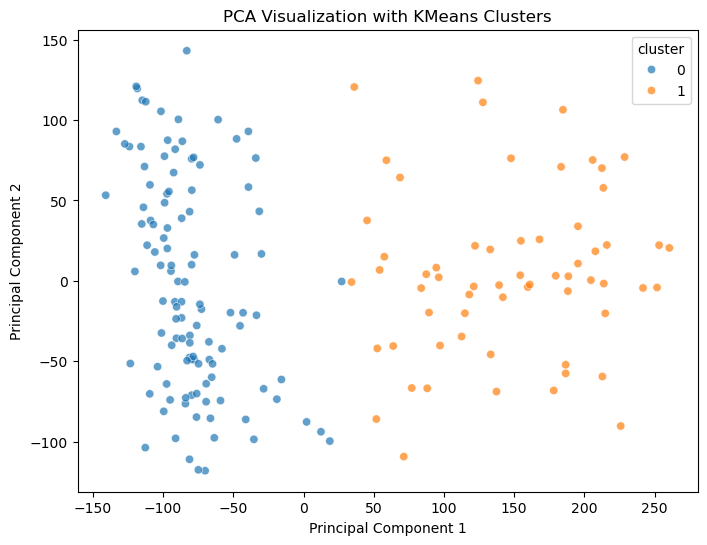

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca-one', y='pca-two', hue='cluster', data=merged_df,
                palette='tab10', legend='full', alpha=0.7)
plt.title("PCA Visualization with KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [51]:
tsne = TSNE(n_components=2, perplexity=50, max_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(numeric_df)
merged_df['tsne-one'] = tsne_results[:, 0]
merged_df['tsne-two'] = tsne_results[:, 1]

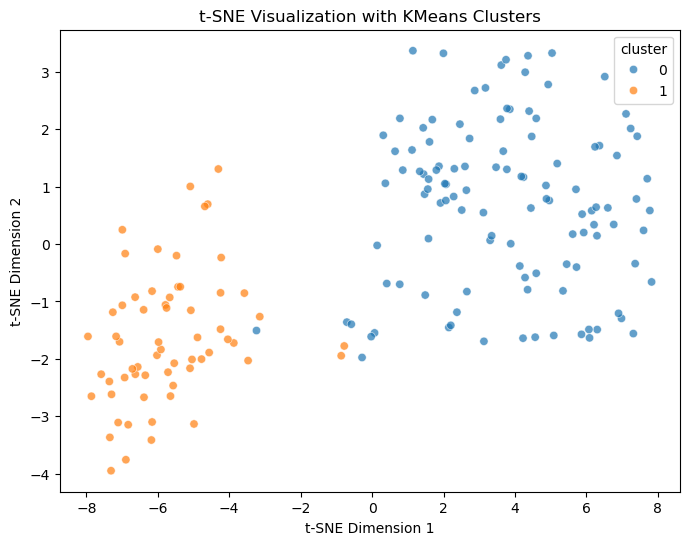

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne-one', y='tsne-two', hue='cluster', data=merged_df,
                palette='tab10', legend='full', alpha=0.7)
plt.title("t-SNE Visualization with KMeans Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [53]:
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(numeric_df)
merged_df['umap-one'] = umap_results[:, 0]
merged_df['umap-two'] = umap_results[:, 1]

/Users/rajarshighoshal/miniconda3/envs/embl_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/rajarshighoshal/miniconda3/envs/embl_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


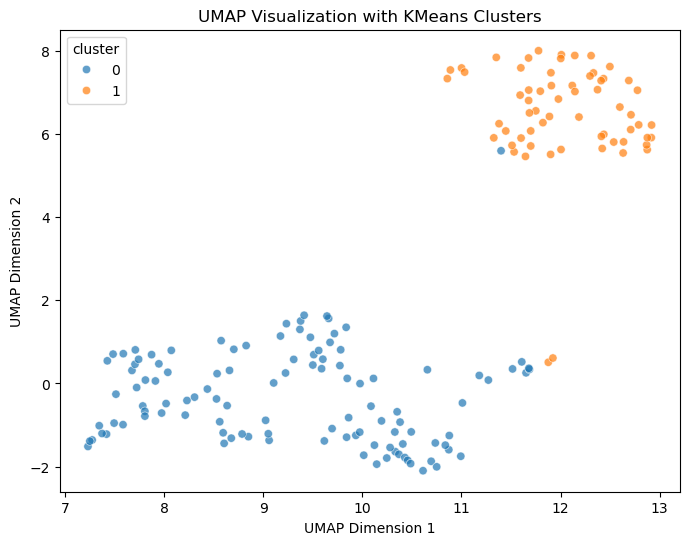

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umap-one', y='umap-two', hue='cluster', data=merged_df,
                palette='tab10', legend='full', alpha=0.7)
plt.title("UMAP Visualization with KMeans Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [55]:
fusions_final_df = fusions_final_df.set_index('model_id')

In [56]:
copynumer_df.to_pickle('./processed_data/copynumer_df.pkl')
drugresponse_df.to_pickle('./processed_data/drugresponse_df.pkl')
metabolomics_df.to_pickle('./processed_data/metabolomics_df.pkl')
methylation_df.to_pickle('./processed_data/methylation_df.pkl')
proteomics_df.to_pickle('./processed_data/proteomics_df.pkl')
transcriptomics_df.to_pickle('./processed_data/transcriptomics_df.pkl')
fusions_final_df.to_pickle('./processed_data/fusions_final_df.pkl')

In [57]:
merged_df.head()

,model_id,fusion_count,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,...,ZYX_transcriptomics,ZZEF1_transcriptomics,ZZZ3_transcriptomics,cluster,pca-one,pca-two,tsne-one,tsne-two,umap-one,umap-two
0,SIDM00046,15,0,0,1,1,3,5,0,4,...,7.85737,6.32957,5.04573,0,-118.430598,119.645280,7.776402,0.583064,7.724248,-0.097400
1,SIDM00047,2,0,0,1,0,0,1,0,0,...,7.02936,5.91940,5.83587,0,-90.496353,-35.644543,2.509853,0.591091,9.616877,-1.380904
2,SIDM00048,9,1,0,0,0,0,4,0,3,...,7.08207,6.02523,5.65201,0,-101.732564,9.669851,3.304724,0.064171,9.060257,-1.366440
3,SIDM00098,4,0,0,1,0,0,2,0,1,...,7.11551,6.26238,5.83334,0,-59.129639,-74.419814,1.469489,0.867509,10.122114,-1.482493
4,SIDM00099,1,0,0,0,0,0,1,0,0,...,7.44160,6.32660,5.79604,0,-76.229912,-84.690919,1.442756,1.216793,10.332425,-1.638561


In [58]:
target_df = merged_df[proteomics_df.columns]
input_df = merged_df.drop(proteomics_df.columns, axis=1)

In [59]:
target_df.head()

,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AARS2,AARSD1,AASDHPPT,...,ZNF830,ZNHIT2,ZNRD2,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX
0,0.18369,0.20802,0.10984,0.12974,2.29730,0.10517,5.03959,0.32453,0.21603,0.12701,...,0.24476,0.21942,4.87203,0.26542,2.74466,0.19371,0.14302,1.44500,0.09315,0.26836
1,0.19908,0.24347,0.12132,0.14310,1.37197,0.11714,5.14901,0.30663,0.16933,0.13448,...,0.18164,0.22284,3.42515,0.22352,3.20215,0.20978,0.16705,1.87061,0.12062,0.26311
2,0.21594,0.26051,0.12995,0.15569,2.15151,0.12986,5.11889,0.34703,0.17918,0.14366,...,0.19378,0.21849,4.14519,0.24087,3.29044,0.22296,0.18142,2.09735,0.13618,0.25063
3,0.18946,0.22993,0.11963,0.13633,2.48636,0.11116,5.59721,0.32115,0.16606,0.13262,...,0.18921,0.21851,4.24853,0.25825,3.93978,0.19346,0.15820,1.90050,0.11573,0.25530
4,0.18315,0.22578,0.11893,0.13674,2.05342,0.10977,4.71901,0.31746,0.16107,0.12791,...,0.20134,0.22597,3.25177,0.25103,2.55263,0.18895,0.15080,1.77170,0.11154,0.24788


In [60]:
input_df.head()

,model_id,fusion_count,in_frame_3UTR_3UTR,in_frame_3UTR_5UTR,in_frame_3UTR_CODING,in_frame_5UTR_5UTR,in_frame_5UTR_CODING,in_frame_No,in_frame_SOMETHING_INTRON,in_frame_Yes,...,ZYX_transcriptomics,ZZEF1_transcriptomics,ZZZ3_transcriptomics,cluster,pca-one,pca-two,tsne-one,tsne-two,umap-one,umap-two
0,SIDM00046,15,0,0,1,1,3,5,0,4,...,7.85737,6.32957,5.04573,0,-118.430598,119.645280,7.776402,0.583064,7.724248,-0.097400
1,SIDM00047,2,0,0,1,0,0,1,0,0,...,7.02936,5.91940,5.83587,0,-90.496353,-35.644543,2.509853,0.591091,9.616877,-1.380904
2,SIDM00048,9,1,0,0,0,0,4,0,3,...,7.08207,6.02523,5.65201,0,-101.732564,9.669851,3.304724,0.064171,9.060257,-1.366440
3,SIDM00098,4,0,0,1,0,0,2,0,1,...,7.11551,6.26238,5.83334,0,-59.129639,-74.419814,1.469489,0.867509,10.122114,-1.482493
4,SIDM00099,1,0,0,0,0,0,1,0,0,...,7.44160,6.32660,5.79604,0,-76.229912,-84.690919,1.442756,1.216793,10.332425,-1.638561


In [61]:
target_df.to_pickle('./processed_data/target_df.pkl')
input_df.to_pickle('./processed_data/input_df.pkl')